# 신용대출 심사

* 고객사는 ## 은행입니다. 신용평가 업무를 인공지능으로 전환하고자 여러분에게 모델링을 의뢰하였습니다.
* 대출업무는
    * 은행 창구에서 신청을 받고
    * 본사의 심사부서에서는 신용평가를 통해 대출 신청에 대한 승인 여부를 결정해 왔습니다.

* 현장의 요구
    * 경쟁사의 공격적인 대출상품 판매로, 본사에서는 자사 은행의 대출 실적이 줄어들고 있는 것에 부담을 느끼고 있습니다.
    * 그런데, 자사 은행에서는 신용평가 결과의 정확성에 의문을 품고 있으며, 신용평가 기준을 완화하여 가급적 대출승인 범위를 더 확대해 주기를 요구합니다. 

* 신용평가 업무를 인공지능으로 전환
    * 현장의 요구를 감안하여, 과거 사람이 하던 평가방식을 개선하고자 인공지능에 의한 예측 모델을 만들고, 정확도를 높이고자 합니다.
-----------------


* 이제 인공지능에 의한 신용평가 시스템은 큰 무리 없이 작동하며 한 달여 운영되어 오고 있습니다. 한 달 동안의 운영 보고서를 작성해야 할 시점입니다.

* 그런데, 인공지능 신용평가 시스템에 대해 처음부터 부정적인 견해를 가져온 고객사 재무 담당 임원이, 심사 기간 단축 말고 구체적으로 **어떤 비즈니스 성과를 가져다 줄 것인지**를 설명해 달라고 요구 해 왔습니다.

* 또 다시 여러분에게 미션이 주어졌습니다. 인공지능 모델을 어떻게 비즈니스 성과로 연결할 수 있을까요?
* 고객사의 과거자료를 검토하며 다음과 같이 대출 수익구조를 정리하게 되었습니다.
    * 제 때 대출이자와 원금을 상환하는 고객으로부터, 평균적으로 대출금의 약 4%(연) 이자 수익이 발생 되었습니다. 
    * 제 때 상환하지 않는 고객으로 인해, 평균적으로 약 9%의 원금 손실(연)이 발생됩니다. 
    * 평균 대출 금액은 약 3200달러, 평균 대출 기간은 2년 입니다.



## 1.환경준비

### 1) 라이브러리 로딩

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

### 2) 데이터 로딩

In [12]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	CreditDuration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


In [13]:
data['CreditAmount'].mean()

3271.248


* 데이터의 크기를 살펴봅시다.

In [14]:
data.shape

(1000, 17)

* Target 변수 조회

1    700
0    300
Name: Creditability, dtype: int64
1    0.7
0    0.3
Name: Creditability, dtype: float64


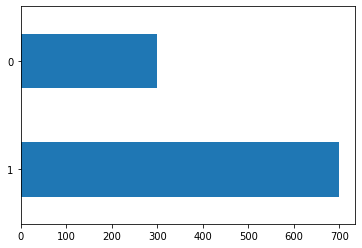

In [15]:
print(data['Creditability'].value_counts())
print(data['Creditability'].value_counts()/ data.shape[0])

data['Creditability'].value_counts().plot(kind = 'barh')
plt.show()

## 2.데이터 준비


### 1) x, y로 나누기 

In [6]:
target = 'Creditability'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

In [7]:
dummy_vars = ['Employment', 'CurrentAddress', 'CreditCount', 'Dependents', 'Telephone', 'AccountBalance', 'Payment', 'Purpose', 'SexMarital', 'MostValuableAsset', 'Apartment','Occupation','ForeignWorker']


x = pd.get_dummies(x, columns = dummy_vars)
x.head()

,Duration,CreditAmount,Age,Employment_1,Employment_2,Employment_3,Employment_4,Employment_5,CurrentAddress_1,CurrentAddress_2,...,MostValuableAsset_4,Apartment_1,Apartment_2,Apartment_3,Occupation_1,Occupation_2,Occupation_3,Occupation_4,ForeignWorker_1,ForeignWorker_2
0,24,1249,28,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,9,276,22,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,18,1049,21,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,24,6419,44,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
4,12,1424,55,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


### 3) train : validation 분할

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 2022)

In [10]:
x_train.shape

(800, 54)

## 3.모델링
* 종합실습을 통해 선정된 모델을 다시 생성합시다.

### 1) 학습

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [24]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

### 2) 예측 및 평가
* validation set으로 예측하고 평가하시오.

In [20]:
m1 = RandomForestClassifier()
m1.fit(x_train, y_train)

p1 = m1.predict(x_val)

In [32]:
cm1 = confusion_matrix(y_val, p1)
print(classification_report(y_val, p1))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51        60
           1       0.79      0.82      0.80       140

    accuracy                           0.72       200
   macro avg       0.66      0.65      0.66       200
weighted avg       0.71      0.72      0.72       200



In [25]:
m2 = KNeighborsClassifier()
m2.fit(x_train_s, y_train)

p2 = m2.predict(x_val_s)

In [33]:
cm2 = confusion_matrix(y_val, p2)
print(classification_report(y_val, p2))

              precision    recall  f1-score   support

           0       0.55      0.38      0.45        60
           1       0.77      0.86      0.81       140

    accuracy                           0.72       200
   macro avg       0.66      0.62      0.63       200
weighted avg       0.70      0.72      0.70       200



In [22]:
m3 = XGBClassifier()
m3.fit(x_train, y_train)

p3 = m3.predict(x_val)

In [34]:
cm3 = confusion_matrix(y_val, p3)
print(classification_report(y_val, p3))

              precision    recall  f1-score   support

           0       0.55      0.47      0.50        60
           1       0.79      0.84      0.81       140

    accuracy                           0.73       200
   macro avg       0.67      0.65      0.66       200
weighted avg       0.71      0.72      0.72       200



## 4.비즈니스 기대가치 평가

* 비즈니스 가치 matrix

In [46]:
bv = np.array([[0, -0.18], [-0.08, 0.08]])
bv

array([[ 0.  , -0.18],
       [-0.08,  0.08]])

* 모델의 성적표 (Confusion matrix)

In [51]:
cm1p = cm1 / np.sum(cm1)
cm2p = cm2 / np.sum(cm2)
cm3p = cm3 / np.sum(cm3)

* 기대가치 계산하기

In [52]:
print('RF: ', np.sum(cm1p * bv)*3200)
print('KNN: ', np.sum(cm2p * bv)*3200)
print('XGB: ', np.sum(cm3p * bv)*3200)

RF:  25.92000000000001
KNN:  24.0
XGB:  28.160000000000007


## 5.실습 : 모델 개선하기

* 위에서 만든 모델보다 좀더 나은 모델을 만들어 봅시다.
* 다양한 모델을 만들어 봅시다. (최소 2개 이상)
    * 여러 알고리즘
    * 하이퍼파라미터 튜닝(GridSearchCV, RandomizedSearchCV)

In [53]:
from sklearn.svm import SVC

In [54]:
params = {'C': range(2, 21, 2), 'gamma':np.linspace(0.1, 10, 20)}

In [55]:
svm_gs = GridSearchCV(SVC(), params, cv=5)
svm_gs.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(2, 21, 2),
                         'gamma': array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ])})

In [57]:
svm_gs.best_params_

{'C': 2, 'gamma': 0.1}

In [60]:
p4 = svm_gs.predict(x_val_s)
cm4 = confusion_matrix(y_val, p4)

In [42]:
params = {'n_estimators': range(10, 101, 10), 'learning_rate': np.linspace(0.01, 0.2, 20)}

In [43]:
xgb_gs = GridSearchCV(XGBClassifier(), params, cv=5)
xgb_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                         'n_estimators': range(10, 101, 10)})

In [56]:
xgb_gs.best_params_

{'learning_rate': 0.17, 'n_estimators': 30}

In [58]:
p5 = xgb_gs.predict(x_val)
cm5 = confusion_matrix(y_val, p5)

* 개선된 모델과 이전 모델에 대해서 다음의 항목으로 평가하시오.
    * ML Metric : Accuracy
    * Business Metric : 예상 수익
* 산출된 결과에 대한 여러분의 의견을 작성해주세요.

In [63]:
print(classification_report(y_val, p4))

              precision    recall  f1-score   support

           0       0.51      0.48      0.50        60
           1       0.78      0.80      0.79       140

    accuracy                           0.70       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.70      0.70      0.70       200



In [64]:
print(classification_report(y_val, p5))

              precision    recall  f1-score   support

           0       0.60      0.48      0.54        60
           1       0.80      0.86      0.83       140

    accuracy                           0.75       200
   macro avg       0.70      0.67      0.68       200
weighted avg       0.74      0.75      0.74       200



* 기대가치 비교하기

In [61]:
cm4p = cm4 / np.sum(cm4)
cm5p = cm5 / np.sum(cm5)

In [62]:
print('SVM: ', np.sum(cm4p * bv)*3200)
print('XGB: ', np.sum(cm5p * bv)*3200)

SVM:  18.240000000000034
XGB:  41.28000000000001


## 6.[추가]성능 튜닝시 평가지표 교체

* 튜닝시 Classification의 평가함수는 기본적으로 accuracy 입니다.
* 이를 최대화 하는 하이퍼파라미터를 찾게 됩니다.
* 비즈니스 평가 계산 함수를 만들고, 튜닝평가 함수를 교체하여 튜닝해 봅시다.

### 1) 비즈니스 기대가치 지표로 평가할 함수 생성

In [65]:
def biz_score(y, pred, biz_v):
    cm = confusion_matrix(y, pred)
    cm_p = cm / np.sum(cm)
    amt_mean = 3200

    return np.sum(biz_v * cm_p) * amt_mean

In [66]:
b_score = make_scorer(biz_score, greater_is_better= True, biz_v = bv )

### 2) 기대가치를 최대화 해주는 하이퍼파라미터 찾기

In [67]:
# random하게 찾을 범위를 지정
maxdepth =list(range(3,8))
nestimators = list(range(10,300,10))
param_dist = dict(max_depth= maxdepth, n_estimators = nestimators)

# 모델선언
rf=RandomForestClassifier()
grid_rf = GridSearchCV(rf
                          , param_dist
                          , cv=5                    # k-fold Cross Validation!
                          , scoring=b_score)
# 학습
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290]},
             scoring=make_scorer(biz_score, biz_v=[[ 0.   -0.18]
 [-0.08  0.08]]))

* best params, best score(비즈니스 기대가치)

In [68]:
grid_rf.best_params_, grid_rf.best_score_

({'max_depth': 7, 'n_estimators': 210}, 40.31999999999999)

* 튜닝 과정에 대한 그래프를 그려봅시다.

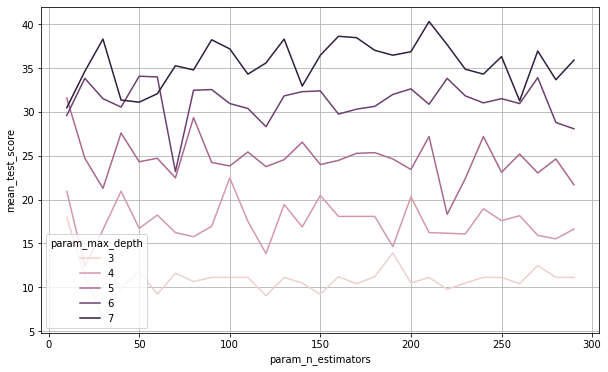

In [69]:
result = pd.DataFrame(grid_rf.cv_results_)
result.loc[:, ['param_max_depth', 'param_n_estimators', 'mean_test_score' ]]

plt.figure(figsize = (10,6))
sns.lineplot(result['param_n_estimators'], result['mean_test_score'], hue = result['param_max_depth'])

plt.grid()
plt.show()